In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Experimentos del TP2
- En este archivo se lee el output de los experimentos y se muestra de manera gráfica esos resultados.
- Comparamos los tiempos de la implementación del filtro en assembler con la implementación del filtro en C.

In [2]:
resoluciones =[(32,16),(64,32),(128,64),(256,128),(400,300),(512,256),(800,600),(1600,1200)]
resoluciones_barplots = [(256,128),(400,300),(512,256),(800,600)]
optimizaciones = ["C0","C1","C2","C3"]

# Gamma
Leemos los .csv del filtro Gamma

In [3]:
df_Gamma_ASM_tiempos = pd.DataFrame()

for res in resoluciones:
    tamaño_filas = res[0]
    tamaño_columnas = res[1]
    cant_pixeles = tamaño_filas * tamaño_columnas
    df_Gamma_ASM_tiempos_actual = pd.read_csv("resultados/Gamma/Gamma_ASM_"+str(tamaño_filas)+"x"+str(tamaño_columnas)+".csv")
    df_Gamma_ASM_tiempos_actual.set_axis(['ciclos_por_llamada'], axis='columns', inplace = True)
    df_Gamma_ASM_tiempos_actual['tamaño_filas'] = tamaño_filas
    df_Gamma_ASM_tiempos_actual['tamaño_columnas'] = tamaño_columnas
    df_Gamma_ASM_tiempos_actual['cant_pixeles'] = cant_pixeles
    df_Gamma_ASM_tiempos_actual['dimensiones'] = "{} x {}".format(tamaño_filas, tamaño_columnas)
    df_Gamma_ASM_tiempos = df_Gamma_ASM_tiempos.append(df_Gamma_ASM_tiempos_actual, ignore_index = True, sort = False)
df_Gamma_ASM_tiempos.sort_values(by=['cant_pixeles'])

,ciclos_por_llamada,tamaño_filas,tamaño_columnas,cant_pixeles,dimensiones
0,14209,32,16,512,32 x 16
72,13291,32,16,512,32 x 16
71,13069,32,16,512,32 x 16
70,13320,32,16,512,32 x 16
69,13319,32,16,512,32 x 16
...,...,...,...,...,...
720,39069483,1600,1200,1920000,1600 x 1200
719,39498584,1600,1200,1920000,1600 x 1200
718,38851973,1600,1200,1920000,1600 x 1200
728,38632188,1600,1200,1920000,1600 x 1200


## Comparación de optimizaciones de C

### Resolucion 256 x 128

In [4]:
vec_Gamma_C_tiempos = []
for optimizacion in optimizaciones:
    df_Gamma_C_tiempos_actual = pd.read_csv("resultados/Gamma_"+optimizacion+"/Gamma_"+optimizacion+"_256x128.csv")
    df_Gamma_C_tiempos_actual.set_axis([optimizacion], axis='columns', inplace = True)
    vec_Gamma_C_tiempos.append(df_Gamma_C_tiempos_actual)
df_Gamma_C_tiempos = pd.concat(vec_Gamma_C_tiempos, axis=1)
df_Gamma_C_tiempos.head()
df_Gamma_C_tiempos.drop(df_Gamma_C_tiempos.tail(899).index,inplace = True)  # Me quedo con las primeras 100 rows porque corri 1000 veces este exp
df_Gamma_C_tiempos.sort_values(by=['C0'])

,C0,C1,C2,C3
87,6867846,7332291,7369690,6948686
26,6869794,7243413,7171248,7166143
19,6887259,7985812,7145428,7196500
20,6970022,7829797,7177527,7152807
30,6972489,7271097,7439440,7089460
...,...,...,...,...
12,7283477,7613714,7542044,7185629
95,7284974,7386250,7162360,7184139
86,7289400,7182562,7083197,7212195
21,7300569,7453744,7465970,7236069


In [5]:
#barplot = df_Gamma_C_tiempos.mean().sort_values().plot(kind='bar')
#barplot.set_ylabel("Ciclos insumidos por llamada")

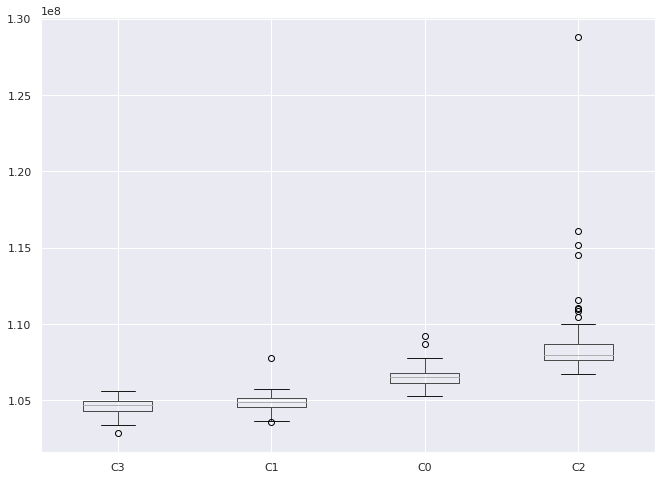

In [26]:
meds = df_Gamma_C_tiempos.median()
meds.sort_values(ascending=True, inplace=True)
df_Gamma_C_tiempos = df_Gamma_C_tiempos[meds.index]
df_Gamma_C_tiempos.boxplot()

plt.show()

### Resolucion 400 x 300

In [27]:
vec_Gamma_C_tiempos = []
for optimizacion in optimizaciones:
    df_Gamma_C_tiempos_actual = pd.read_csv("resultados/Gamma_"+optimizacion+"/Gamma_"+optimizacion+"_400x300.csv")
    df_Gamma_C_tiempos_actual.set_axis([optimizacion], axis='columns', inplace = True)
    vec_Gamma_C_tiempos.append(df_Gamma_C_tiempos_actual)
df_Gamma_C_tiempos = pd.concat(vec_Gamma_C_tiempos, axis=1)
df_Gamma_C_tiempos.head()
df_Gamma_C_tiempos.drop(df_Gamma_C_tiempos.tail(899).index,inplace = True)  # Me quedo con las primeras 100 rows porque corri 1000 veces este exp
df_Gamma_C_tiempos.sort_values(by=['C0'])

,C0,C1,C2,C3
2,26229554,26289254,26772801,26936828
16,26242331,26461903,26790556,26789704
83,26248780,26204912,26928979,27023032
17,26288245,26409885,26753926,26256001
28,26316585,26294771,26884539,26724149
...,...,...,...,...
41,27020104,26293020,27217731,26424082
60,27023202,26681826,27032610,26389623
18,27055831,26485655,26879062,26268167
3,27151993,26334751,26884028,26703396


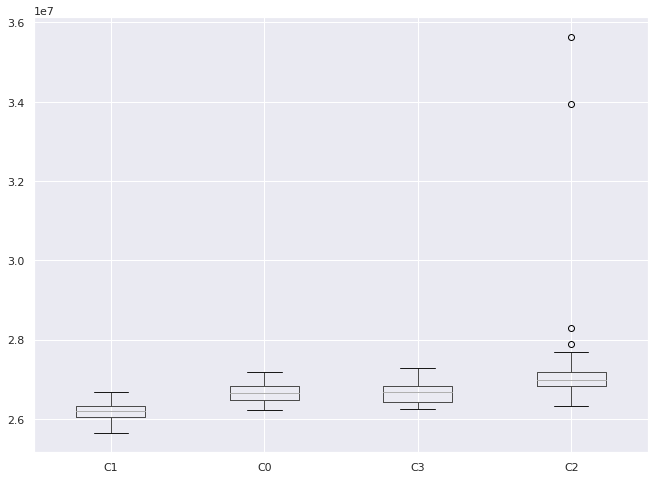

In [28]:
meds = df_Gamma_C_tiempos.median()
meds.sort_values(ascending=True, inplace=True)
df_Gamma_C_tiempos = df_Gamma_C_tiempos[meds.index]
df_Gamma_C_tiempos.boxplot()

plt.show()

### Resolucion 512 x 256

In [29]:
vec_Gamma_C_tiempos = []
for optimizacion in optimizaciones:
    df_Gamma_C_tiempos_actual = pd.read_csv("resultados/Gamma_"+optimizacion+"/Gamma_"+optimizacion+"_512x256.csv")
    df_Gamma_C_tiempos_actual.set_axis([optimizacion], axis='columns', inplace = True)
    vec_Gamma_C_tiempos.append(df_Gamma_C_tiempos_actual)
df_Gamma_C_tiempos = pd.concat(vec_Gamma_C_tiempos, axis=1)
df_Gamma_C_tiempos.head()
df_Gamma_C_tiempos.drop(df_Gamma_C_tiempos.tail(899).index,inplace = True)  # Me quedo con las primeras 100 rows porque corri 1000 veces este exp
df_Gamma_C_tiempos.sort_values(by=['C0'])

,C0,C1,C2,C3
64,28862312,29426300,29238523,28789900
85,28903133,29259164,29118622,28690631
17,28969882,29017940,31635547,28705750
71,29002175,29347944,29403060,28536571
67,29004366,29884390,29071148,28586291
...,...,...,...,...
11,30102823,30551631,28749407,30747080
6,30217376,29576127,28345247,28367867
32,30271169,29003166,29095883,28828051
23,30413137,29476672,29317075,28426527


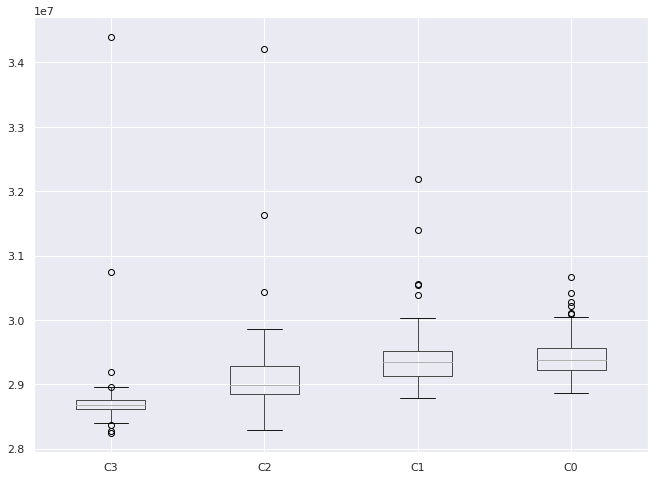

In [30]:
meds = df_Gamma_C_tiempos.median()
meds.sort_values(ascending=True, inplace=True)
df_Gamma_C_tiempos = df_Gamma_C_tiempos[meds.index]
df_Gamma_C_tiempos.boxplot()

plt.show()

### Resolucion 800 x 600

In [31]:
vec_Gamma_C_tiempos = []
for optimizacion in optimizaciones:
    df_Gamma_C_tiempos_actual = pd.read_csv("resultados/Gamma_"+optimizacion+"/Gamma_"+optimizacion+"_800x600.csv")
    df_Gamma_C_tiempos_actual.set_axis([optimizacion], axis='columns', inplace = True)
    vec_Gamma_C_tiempos.append(df_Gamma_C_tiempos_actual)
df_Gamma_C_tiempos = pd.concat(vec_Gamma_C_tiempos, axis=1)
df_Gamma_C_tiempos.head()
df_Gamma_C_tiempos.drop(df_Gamma_C_tiempos.tail(899).index,inplace = True)  # Me quedo con las primeras 100 rows porque corri 1000 veces este exp
df_Gamma_C_tiempos.sort_values(by=['C0'])

,C0,C1,C2,C3
20,105287739,105102862,110994880,104470471
32,105502293,105042307,107518541,103709231
15,105567053,104753926,108249105,104509139
27,105704583,105000886,108715479,103941380
18,105763360,105256621,108285669,104976374
...,...,...,...,...
53,107657286,105085692,108528660,104949557
41,107704204,105129348,110469176,104544816
81,107734433,104953794,109295182,105273189
1,108690498,104663123,108860846,105087257


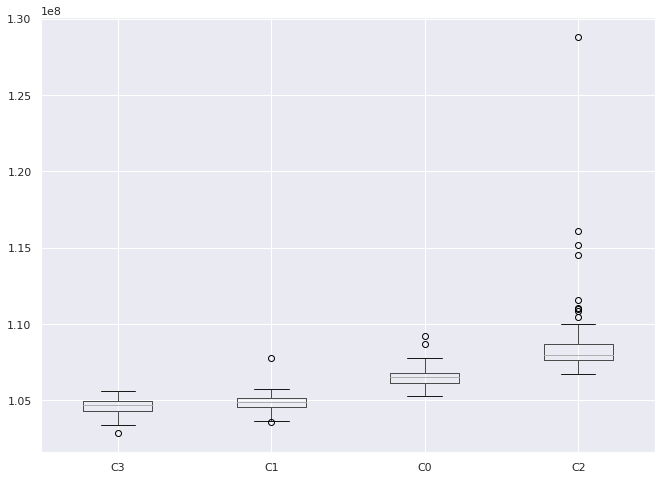

In [32]:
meds = df_Gamma_C_tiempos.median()
meds.sort_values(ascending=True, inplace=True)
df_Gamma_C_tiempos = df_Gamma_C_tiempos[meds.index]
df_Gamma_C_tiempos.boxplot()

plt.show()

## Comparacion C con ASM

Como C3 dio mejores resultados, comparamos Gamma ASM con Gamma C3 

In [33]:
df_Gamma_C3_tiempos = pd.DataFrame()

for res in resoluciones:
    tamaño_filas = res[0]
    tamaño_columnas = res[1]
    cant_pixeles = tamaño_filas * tamaño_columnas
    df_Gamma_C3_tiempos_actual = pd.read_csv("resultados/Gamma_C3/Gamma_C3_"+str(tamaño_filas)+"x"+str(tamaño_columnas)+".csv")
    df_Gamma_C3_tiempos_actual.set_axis(['ciclos_por_llamada'], axis='columns', inplace = True)
    df_Gamma_C3_tiempos_actual['tamaño_filas'] = tamaño_filas
    df_Gamma_C3_tiempos_actual['tamaño_columnas'] = tamaño_columnas
    df_Gamma_C3_tiempos_actual['cant_pixeles'] = cant_pixeles
    df_Gamma_C3_tiempos_actual['dimensiones'] = "{} x {}".format(tamaño_filas, tamaño_columnas)
    df_Gamma_C3_tiempos_actual.drop(df_Gamma_C3_tiempos_actual.tail(899).index,inplace = True)  # Me quedo con las primeras 100 rows porque corri 1000 veces este exp
    df_Gamma_C3_tiempos = df_Gamma_C3_tiempos.append(df_Gamma_C3_tiempos_actual, ignore_index = True, sort = False)
df_Gamma_C3_tiempos.sort_values(by=['cant_pixeles'])

,ciclos_por_llamada,tamaño_filas,tamaño_columnas,cant_pixeles,dimensiones
0,187314,32,16,512,32 x 16
72,187405,32,16,512,32 x 16
71,187376,32,16,512,32 x 16
70,187381,32,16,512,32 x 16
69,187473,32,16,512,32 x 16
...,...,...,...,...,...
727,433587023,1600,1200,1920000,1600 x 1200
726,432692910,1600,1200,1920000,1600 x 1200
725,431574384,1600,1200,1920000,1600 x 1200
735,431722970,1600,1200,1920000,1600 x 1200


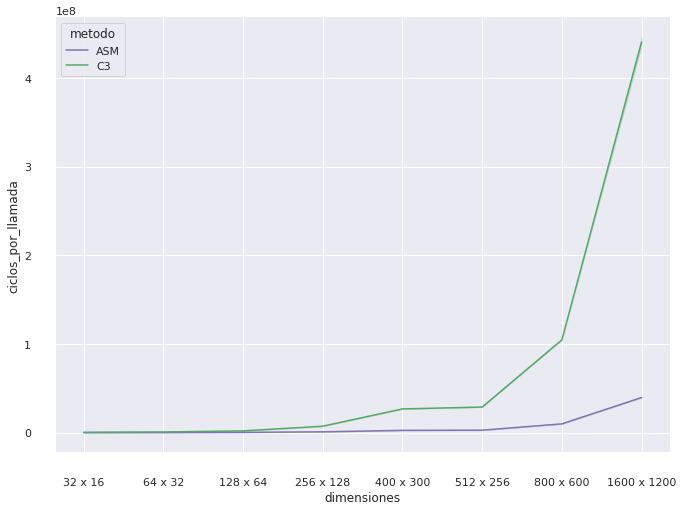

In [34]:
df_Gamma_ASM_tiempos['metodo'] ='ASM'
df_Gamma_C3_tiempos['metodo'] ='C3'
df_comp_Gamma = pd.concat([df_Gamma_ASM_tiempos, df_Gamma_C3_tiempos], axis=0)

#df_comp_Gamma = df_comp_Gamma[(df_comp_Gamma["cant_pixeles"]<1920000)].copy();
sns.lineplot(x="dimensiones", y="ciclos_por_llamada", hue="metodo",
            palette=["m", "g"],
            data=df_comp_Gamma)
sns.despine(offset=15, trim=True)
sns.set(rc={'figure.figsize':(11,8)})

# Broken
Leemos los .csv del filtro Broken

In [3]:
df_Broken_ASM_tiempos = pd.DataFrame()

for res in resoluciones:
    tamaño_filas = res[0]
    tamaño_columnas = res[1]
    cant_pixeles = tamaño_filas * tamaño_columnas
    df_Broken_ASM_tiempos_actual = pd.read_csv("resultados/Broken/Broken_ASM_"+str(tamaño_filas)+"x"+str(tamaño_columnas)+".csv")
    df_Broken_ASM_tiempos_actual.set_axis(['ciclos_por_llamada'], axis='columns', inplace = True)
    df_Broken_ASM_tiempos_actual['tamaño_filas'] = tamaño_filas
    df_Broken_ASM_tiempos_actual['tamaño_columnas'] = tamaño_columnas
    df_Broken_ASM_tiempos_actual['cant_pixeles'] = cant_pixeles
    df_Broken_ASM_tiempos_actual['dimensiones'] = "{} x {}".format(tamaño_filas, tamaño_columnas)
    df_Broken_ASM_tiempos_actual.drop(df_Broken_ASM_tiempos_actual.tail(899).index,inplace = True)  # Me quedo con las primeras 100 rows porque corri 1000 veces este exp    
    df_Broken_ASM_tiempos = df_Broken_ASM_tiempos.append(df_Broken_ASM_tiempos_actual, ignore_index = True, sort = False)
df_Broken_ASM_tiempos.sort_values(by=['cant_pixeles'])

,ciclos_por_llamada,tamaño_filas,tamaño_columnas,cant_pixeles,dimensiones
0,11867,32,16,512,32 x 16
72,8841,32,16,512,32 x 16
71,8849,32,16,512,32 x 16
70,8824,32,16,512,32 x 16
69,9606,32,16,512,32 x 16
...,...,...,...,...,...
727,13693736,1600,1200,1920000,1600 x 1200
726,13523340,1600,1200,1920000,1600 x 1200
725,13589005,1600,1200,1920000,1600 x 1200
735,13122674,1600,1200,1920000,1600 x 1200


## Comparación de optimizaciones de C

### Resolucion 256 x 128

In [16]:
vec_Broken_C_tiempos = []
for optimizacion in optimizaciones:
    df_Broken_C_tiempos_actual = pd.read_csv("resultados/Broken_"+optimizacion+"/Broken_"+optimizacion+"_256x128.csv")
    df_Broken_C_tiempos_actual.set_axis([optimizacion], axis='columns', inplace = True)
    vec_Broken_C_tiempos.append(df_Broken_C_tiempos_actual)
df_Broken_C_tiempos = pd.concat(vec_Broken_C_tiempos, axis=1)
df_Broken_C_tiempos.head()
#df_Gamma_C_tiempos.drop(df_Gamma_C_tiempos.tail(899).index,inplace = True)  # Me quedo con las primeras 100 rows porque corri 1000 veces este exp
df_Broken_C_tiempos.sort_values(by=['C0'])

,C0,C1,C2,C3
87,3752682,3926695,4031197,3752214
12,3752693,3753718,3962666,3940174
83,3752804,3753691,3959421,3811370
51,3752896,3753837,3778548,3910834
75,3752944,3753468,3761906,3751706
...,...,...,...,...
92,4166107,3845496,3940961,3862150
95,4302050,3941289,3955890,4007525
2,4890036,3955474,3942811,4105649
0,6705577,3914204,8306572,5457616


In [17]:
#barplot = df_Gamma_C_tiempos.mean().sort_values().plot(kind='bar')
#barplot.set_ylabel("Ciclos insumidos por llamada")

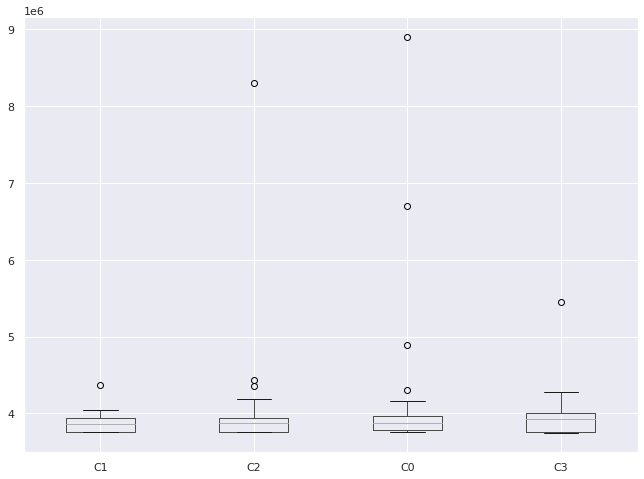

In [18]:
meds = df_Broken_C_tiempos.median()
meds.sort_values(ascending=True, inplace=True)
df_Broken_C_tiempos = df_Broken_C_tiempos[meds.index]
df_Broken_C_tiempos.boxplot()

plt.show()

### Resolucion 400 x 300

In [19]:
vec_Broken_C_tiempos = []
for optimizacion in optimizaciones:
    df_Broken_C_tiempos_actual = pd.read_csv("resultados/Broken_"+optimizacion+"/Broken_"+optimizacion+"_400x300.csv")
    df_Broken_C_tiempos_actual.set_axis([optimizacion], axis='columns', inplace = True)
    vec_Broken_C_tiempos.append(df_Broken_C_tiempos_actual)
df_Broken_C_tiempos = pd.concat(vec_Broken_C_tiempos, axis=1)
df_Broken_C_tiempos.head()
#df_Gamma_C_tiempos.drop(df_Gamma_C_tiempos.tail(899).index,inplace = True)  # Me quedo con las primeras 100 rows porque corri 1000 veces este exp
df_Gamma_C_tiempos.sort_values(by=['C0'])

,C3,C1,C0,C2
20,104470471,105102862,105287739,110994880
32,103709231,105042307,105502293,107518541
15,104509139,104753926,105567053,108249105
27,103941380,105000886,105704583,108715479
18,104976374,105256621,105763360,108285669
...,...,...,...,...
53,104949557,105085692,107657286,108528660
41,104544816,105129348,107704204,110469176
81,105273189,104953794,107734433,109295182
1,105087257,104663123,108690498,108860846


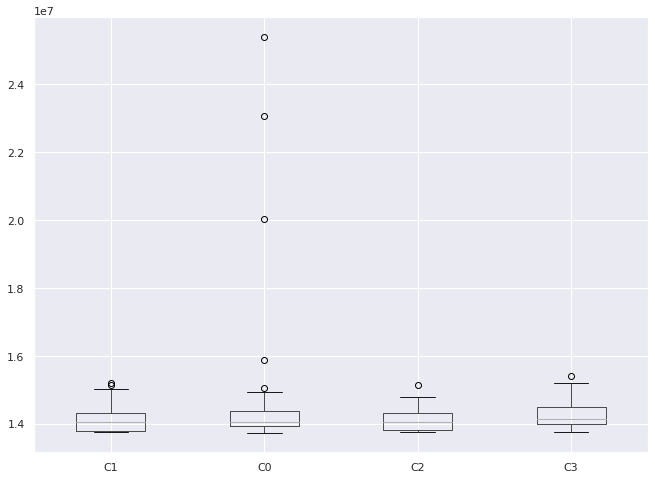

In [20]:
meds = df_Broken_C_tiempos.median()
meds.sort_values(ascending=True, inplace=True)
df_Broken_C_tiempos = df_Broken_C_tiempos[meds.index]
df_Broken_C_tiempos.boxplot()

plt.show()

### Resolucion 512 x 256

In [21]:
vec_Broken_C_tiempos = []
for optimizacion in optimizaciones:
    df_Broken_C_tiempos_actual = pd.read_csv("resultados/Broken_"+optimizacion+"/Broken_"+optimizacion+"_512x256.csv")
    df_Broken_C_tiempos_actual.set_axis([optimizacion], axis='columns', inplace = True)
    vec_Broken_C_tiempos.append(df_Broken_C_tiempos_actual)
df_Broken_C_tiempos = pd.concat(vec_Broken_C_tiempos, axis=1)
df_Broken_C_tiempos.head()
#df_Gamma_C_tiempos.drop(df_Gamma_C_tiempos.tail(899).index,inplace = True)  # Me quedo con las primeras 100 rows porque corri 1000 veces este exp
df_Gamma_C_tiempos.sort_values(by=['C0'])

,C3,C1,C0,C2
20,104470471,105102862,105287739,110994880
32,103709231,105042307,105502293,107518541
15,104509139,104753926,105567053,108249105
27,103941380,105000886,105704583,108715479
18,104976374,105256621,105763360,108285669
...,...,...,...,...
53,104949557,105085692,107657286,108528660
41,104544816,105129348,107704204,110469176
81,105273189,104953794,107734433,109295182
1,105087257,104663123,108690498,108860846


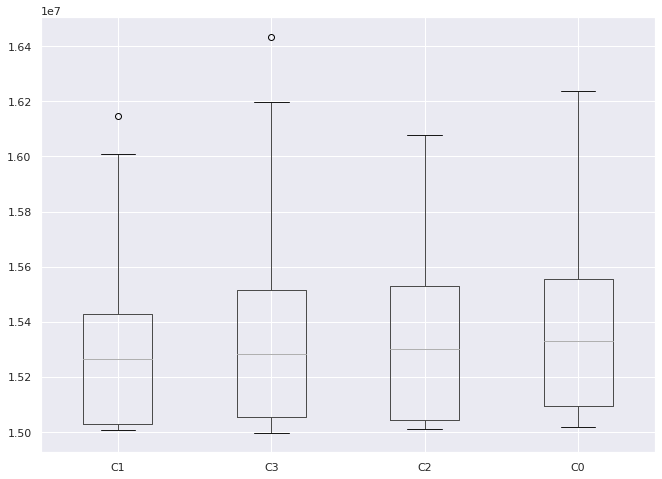

In [22]:
meds = df_Broken_C_tiempos.median()
meds.sort_values(ascending=True, inplace=True)
df_Broken_C_tiempos = df_Broken_C_tiempos[meds.index]
df_Broken_C_tiempos.boxplot()

plt.show()

### Resolucion 800 x 600

In [23]:
vec_Broken_C_tiempos = []
for optimizacion in optimizaciones:
    df_Broken_C_tiempos_actual = pd.read_csv("resultados/Broken_"+optimizacion+"/Broken_"+optimizacion+"_800x600.csv")
    df_Broken_C_tiempos_actual.set_axis([optimizacion], axis='columns', inplace = True)
    vec_Broken_C_tiempos.append(df_Broken_C_tiempos_actual)
df_Broken_C_tiempos = pd.concat(vec_Broken_C_tiempos, axis=1)
df_Broken_C_tiempos.head()
#df_Gamma_C_tiempos.drop(df_Gamma_C_tiempos.tail(899).index,inplace = True)  # Me quedo con las primeras 100 rows porque corri 1000 veces este exp
df_Gamma_C_tiempos.sort_values(by=['C0'])

,C3,C1,C0,C2
20,104470471,105102862,105287739,110994880
32,103709231,105042307,105502293,107518541
15,104509139,104753926,105567053,108249105
27,103941380,105000886,105704583,108715479
18,104976374,105256621,105763360,108285669
...,...,...,...,...
53,104949557,105085692,107657286,108528660
41,104544816,105129348,107704204,110469176
81,105273189,104953794,107734433,109295182
1,105087257,104663123,108690498,108860846


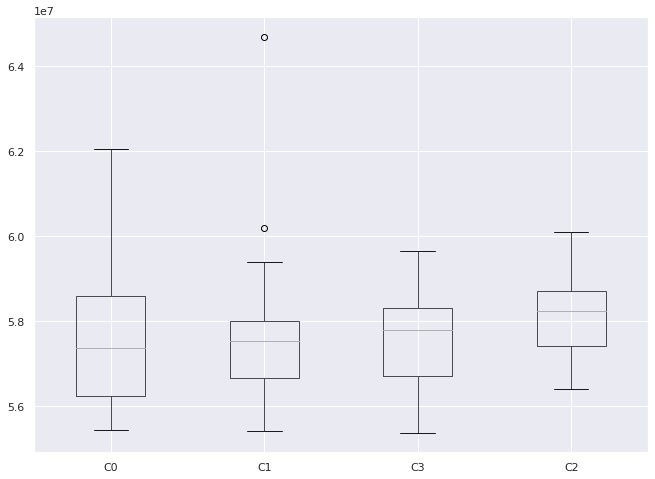

In [24]:
meds = df_Broken_C_tiempos.median()
meds.sort_values(ascending=True, inplace=True)
df_Broken_C_tiempos = df_Broken_C_tiempos[meds.index]
df_Broken_C_tiempos.boxplot()

plt.show()

## Comparacion C con ASM

Como C1 dio mejores resultados, comparamos Broken ASM con Broken C1

In [36]:
df_Broken_C1_tiempos = pd.DataFrame()

for res in resoluciones:
    tamaño_filas = res[0]
    tamaño_columnas = res[1]
    cant_pixeles = tamaño_filas * tamaño_columnas
    df_Broken_C1_tiempos_actual = pd.read_csv("resultados/Broken_C1/Broken_C1_"+str(tamaño_filas)+"x"+str(tamaño_columnas)+".csv")
    df_Broken_C1_tiempos_actual.set_axis(['ciclos_por_llamada'], axis='columns', inplace = True)
    df_Broken_C1_tiempos_actual['tamaño_filas'] = tamaño_filas
    df_Broken_C1_tiempos_actual['tamaño_columnas'] = tamaño_columnas
    df_Broken_C1_tiempos_actual['cant_pixeles'] = cant_pixeles
    df_Broken_C1_tiempos_actual['dimensiones'] = "{} x {}".format(tamaño_filas, tamaño_columnas)
    #df_Broken_C1_tiempos_actual.drop(df_Broken_C1_tiempos_actual.tail(899).index,inplace = True)  # Me quedo con las primeras 100 rows porque corri 1000 veces este exp
    df_Broken_C1_tiempos = df_Broken_C1_tiempos.append(df_Broken_C1_tiempos_actual, ignore_index = True, sort = False)
df_Broken_C1_tiempos.sort_values(by=['cant_pixeles'])

,ciclos_por_llamada,tamaño_filas,tamaño_columnas,cant_pixeles,dimensiones
0,86003,32,16,512,32 x 16
72,85749,32,16,512,32 x 16
71,85749,32,16,512,32 x 16
70,85749,32,16,512,32 x 16
69,85749,32,16,512,32 x 16
...,...,...,...,...,...
720,230126078,1600,1200,1920000,1600 x 1200
719,229924542,1600,1200,1920000,1600 x 1200
718,230618308,1600,1200,1920000,1600 x 1200
728,228431729,1600,1200,1920000,1600 x 1200


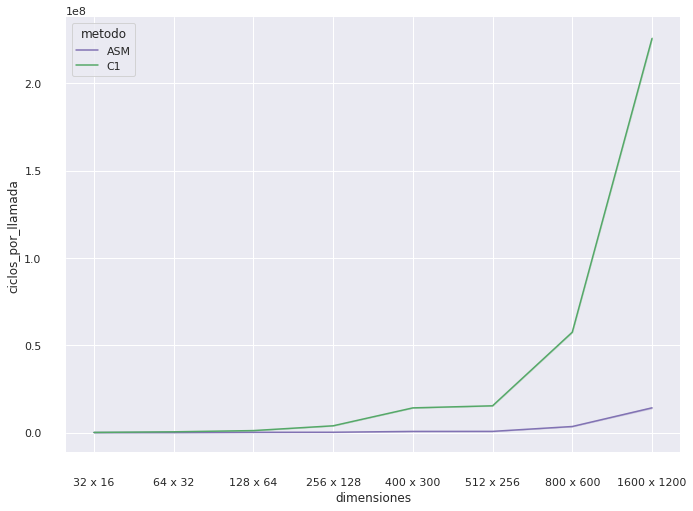

In [37]:
df_Broken_ASM_tiempos['metodo'] ='ASM'
df_Broken_C1_tiempos['metodo'] ='C1'
df_comp_Broken = pd.concat([df_Broken_ASM_tiempos, df_Broken_C1_tiempos], axis=0)

#df_comp_Gamma = df_comp_Gamma[(df_comp_Gamma["cant_pixeles"]<1920000)].copy();
sns.lineplot(x="dimensiones", y="ciclos_por_llamada", hue="metodo",
            palette=["m", "g"],
            data=df_comp_Broken)
sns.despine(offset=15, trim=True)
sns.set(rc={'figure.figsize':(11,8)})

# Max
Leemos los .csv del filtro Max

In [27]:
df_Max_ASM_tiempos = pd.DataFrame()

for res in resoluciones:
    tamaño_filas = res[0]
    tamaño_columnas = res[1]
    cant_pixeles = tamaño_filas * tamaño_columnas
    df_Max_ASM_tiempos_actual = pd.read_csv("resultados/Max/Max_ASM_"+str(tamaño_filas)+"x"+str(tamaño_columnas)+".csv")
    df_Max_ASM_tiempos_actual.set_axis(['ciclos_por_llamada'], axis='columns', inplace = True)
    df_Max_ASM_tiempos_actual['tamaño_filas'] = tamaño_filas
    df_Max_ASM_tiempos_actual['tamaño_columnas'] = tamaño_columnas
    df_Max_ASM_tiempos_actual['cant_pixeles'] = cant_pixeles
    df_Max_ASM_tiempos_actual['dimensiones'] = "{} x {}".format(tamaño_filas, tamaño_columnas)
    df_Max_ASM_tiempos = df_Max_ASM_tiempos.append(df_Max_ASM_tiempos_actual, ignore_index = True, sort = False)
df_Max_ASM_tiempos.sort_values(by=['cant_pixeles'])

,ciclos_por_llamada,tamaño_filas,tamaño_columnas,cant_pixeles,dimensiones
0,49506,32,16,512,32 x 16
658,21649,32,16,512,32 x 16
659,21542,32,16,512,32 x 16
660,21650,32,16,512,32 x 16
661,21543,32,16,512,32 x 16
...,...,...,...,...,...
7331,74435240,1600,1200,1920000,1600 x 1200
7332,75100546,1600,1200,1920000,1600 x 1200
7333,79199100,1600,1200,1920000,1600 x 1200
7320,74462007,1600,1200,1920000,1600 x 1200


## Comparación de optimizaciones de C

### Resolucion 256 x 128

In [28]:
vec_Max_C_tiempos = []
for optimizacion in optimizaciones:
    df_Max_C_tiempos_actual = pd.read_csv("resultados/Max_"+optimizacion+"/Max_"+optimizacion+"_256x128.csv")
    df_Max_C_tiempos_actual.set_axis([optimizacion], axis='columns', inplace = True)
    vec_Max_C_tiempos.append(df_Max_C_tiempos_actual)
df_Max_C_tiempos = pd.concat(vec_Max_C_tiempos, axis=1)
df_Max_C_tiempos.head()
df_Max_C_tiempos.sort_values(by=['C0'])

,C0,C1,C2,C3
94,5176687,6013802,5358736,5990069
33,5183258,5405967,5443479,5439718
53,5186147,5354566,5365171,5152441
93,5186483,6320921,5777358,5318680
6,5189457,5224516,5190184,5142874
...,...,...,...,...
18,6576741,5497517,5510636,5764118
15,6632703,5502712,5541296,5475672
16,6682630,5558803,5245149,5435515
13,6800095,5475350,5466629,5532408


In [29]:
#barplot = df_Gamma_C_tiempos.mean().sort_values().plot(kind='bar')
#barplot.set_ylabel("Ciclos insumidos por llamada")

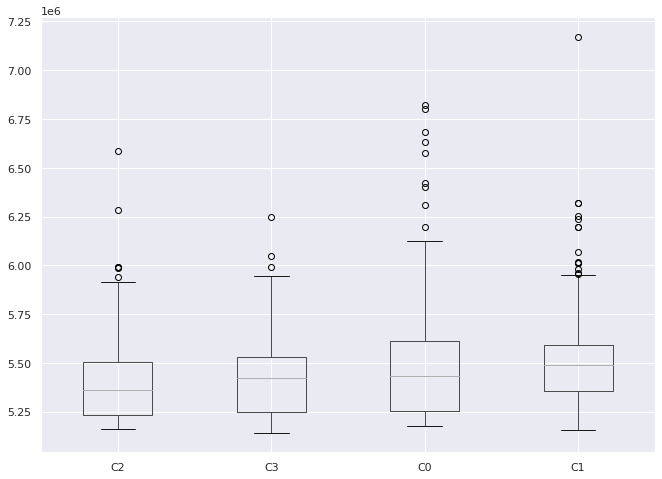

In [30]:
meds = df_Max_C_tiempos.median()
meds.sort_values(ascending=True, inplace=True)
df_Max_C_tiempos = df_Max_C_tiempos[meds.index]
df_Max_C_tiempos.boxplot()

plt.show()

### Resolucion 400 x 300

In [31]:
vec_Max_C_tiempos = []
for optimizacion in optimizaciones:
    df_Max_C_tiempos_actual = pd.read_csv("resultados/Max_"+optimizacion+"/Max_"+optimizacion+"_400x300.csv")
    df_Max_C_tiempos_actual.set_axis([optimizacion], axis='columns', inplace = True)
    vec_Max_C_tiempos.append(df_Max_C_tiempos_actual)
df_Max_C_tiempos = pd.concat(vec_Max_C_tiempos, axis=1)
df_Max_C_tiempos.head()
df_Max_C_tiempos.sort_values(by=['C0'])

,C0,C1,C2,C3
81,18960637,19654994,20241600,19233050
58,18975723,19391046,20326960,20048108
46,18996333,19209591,19212538,19046102
34,18998426,19473676,19393566,19507965
42,19024562,19987459,19473270,19289443
...,...,...,...,...
93,20602983,20632866,20457796,19289834
92,20868915,19915557,20711181,19197814
91,21189787,19557962,20761287,19026571
90,21331694,20157365,20316847,19473560


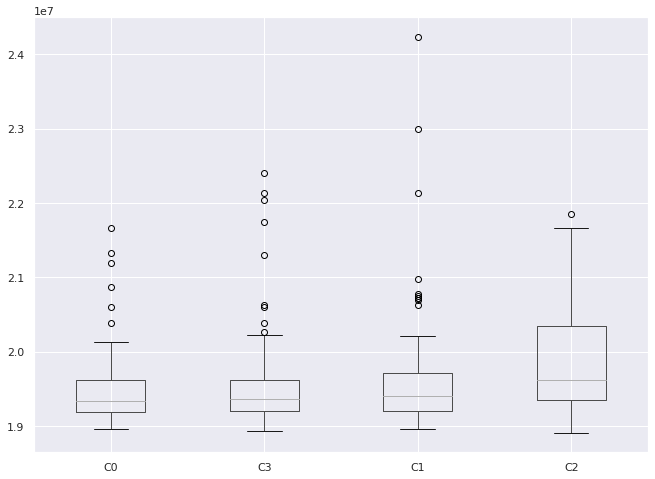

In [32]:
meds = df_Max_C_tiempos.median()
meds.sort_values(ascending=True, inplace=True)
df_Max_C_tiempos = df_Max_C_tiempos[meds.index]
df_Max_C_tiempos.boxplot()

plt.show()

### Resolucion 512 x 256

In [33]:
vec_Max_C_tiempos = []
for optimizacion in optimizaciones:
    df_Max_C_tiempos_actual = pd.read_csv("resultados/Max_"+optimizacion+"/Max_"+optimizacion+"_512x256.csv")
    df_Max_C_tiempos_actual.set_axis([optimizacion], axis='columns', inplace = True)
    vec_Max_C_tiempos.append(df_Max_C_tiempos_actual)
df_Max_C_tiempos = pd.concat(vec_Max_C_tiempos, axis=1)
df_Max_C_tiempos.head()
df_Max_C_tiempos.sort_values(by=['C0'])

,C0,C1,C2,C3
23,20796534,21031753,21743343,23644458
62,20837128,21280790,21257068,22286716
26,20888573,21786772,21675802,21511110
32,20889908,21376250,21445715,21601076
24,20899406,21627655,21298405,22355360
...,...,...,...,...
2,27301261,22359064,26844100,23184881
3,28642566,21629857,26416455,22483238
5,28773188,21274053,24032526,22192611
4,29649245,21124483,26246337,21899319


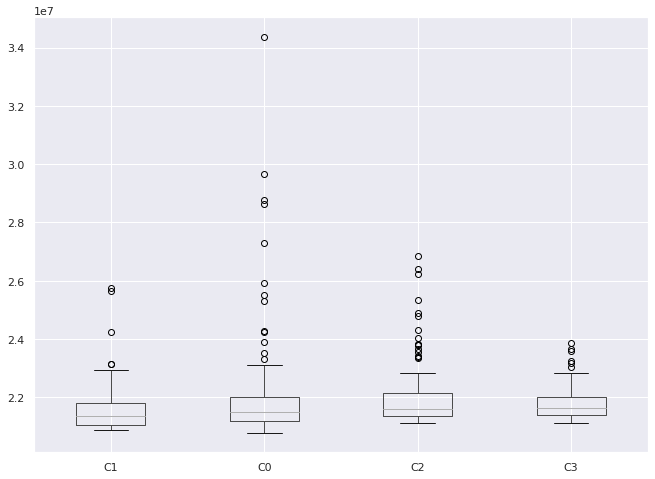

In [34]:
meds = df_Max_C_tiempos.median()
meds.sort_values(ascending=True, inplace=True)
df_Max_C_tiempos = df_Max_C_tiempos[meds.index]
df_Max_C_tiempos.boxplot()

plt.show()

### Resolucion 800 x 600

In [35]:
vec_Max_C_tiempos = []
for optimizacion in optimizaciones:
    df_Max_C_tiempos_actual = pd.read_csv("resultados/Max_"+optimizacion+"/Max_"+optimizacion+"_800x600.csv")
    df_Max_C_tiempos_actual.set_axis([optimizacion], axis='columns', inplace = True)
    vec_Max_C_tiempos.append(df_Max_C_tiempos_actual)
df_Max_C_tiempos = pd.concat(vec_Max_C_tiempos, axis=1)
df_Max_C_tiempos.head()
df_Max_C_tiempos.sort_values(by=['C0'])

,C0,C1,C2,C3
19,79884090,79903033,80080989,83473844
15,79888782,79924523,81722045,81310164
20,79940574,81127504,81393201,85738838
6,79977690,80998110,81943706,84332994
17,79997088,79809744,81406741,81784549
...,...,...,...,...
3,86791710,83616850,85811589,82340352
73,87443593,83851050,85064468,80285197
43,87603528,82805536,87351368,84825086
93,89552352,85208506,85536192,81621274


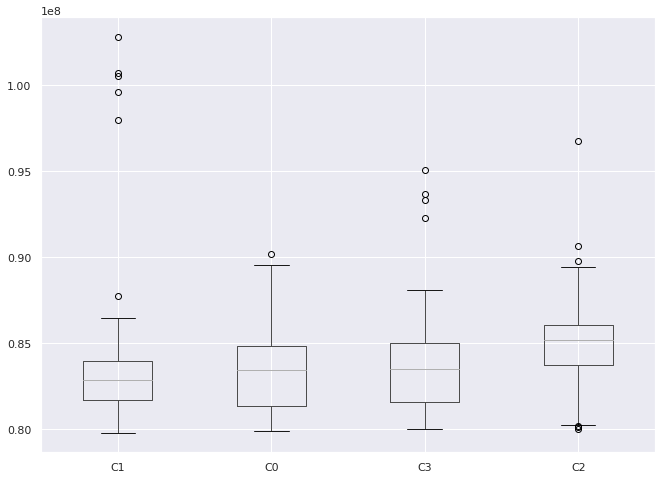

In [36]:
meds = df_Max_C_tiempos.median()
meds.sort_values(ascending=True, inplace=True)
df_Max_C_tiempos = df_Max_C_tiempos[meds.index]
df_Max_C_tiempos.boxplot()

plt.show()

## Comparacion C con ASM

Como C1 dio mejores resultados, comparamos Max ASM con Max C1

In [37]:
df_Max_C1_tiempos = pd.DataFrame()

for res in resoluciones:
    tamaño_filas = res[0]
    tamaño_columnas = res[1]
    cant_pixeles = tamaño_filas * tamaño_columnas
    df_Max_C1_tiempos_actual = pd.read_csv("resultados/Max_C1/Max_C1_"+str(tamaño_filas)+"x"+str(tamaño_columnas)+".csv")
    df_Max_C1_tiempos_actual.set_axis(['ciclos_por_llamada'], axis='columns', inplace = True)
    df_Max_C1_tiempos_actual['tamaño_filas'] = tamaño_filas
    df_Max_C1_tiempos_actual['tamaño_columnas'] = tamaño_columnas
    df_Max_C1_tiempos_actual['cant_pixeles'] = cant_pixeles
    df_Max_C1_tiempos_actual['dimensiones'] = "{} x {}".format(tamaño_filas, tamaño_columnas)
    df_Max_C1_tiempos = df_Max_C1_tiempos.append(df_Max_C1_tiempos_actual, ignore_index = True, sort = False)
df_Max_C1_tiempos.sort_values(by=['cant_pixeles'])

,ciclos_por_llamada,tamaño_filas,tamaño_columnas,cant_pixeles,dimensiones
0,239409,32,16,512,32 x 16
72,220470,32,16,512,32 x 16
71,220714,32,16,512,32 x 16
70,219819,32,16,512,32 x 16
69,220387,32,16,512,32 x 16
...,...,...,...,...,...
720,327419493,1600,1200,1920000,1600 x 1200
719,337689648,1600,1200,1920000,1600 x 1200
718,338800070,1600,1200,1920000,1600 x 1200
728,329719089,1600,1200,1920000,1600 x 1200


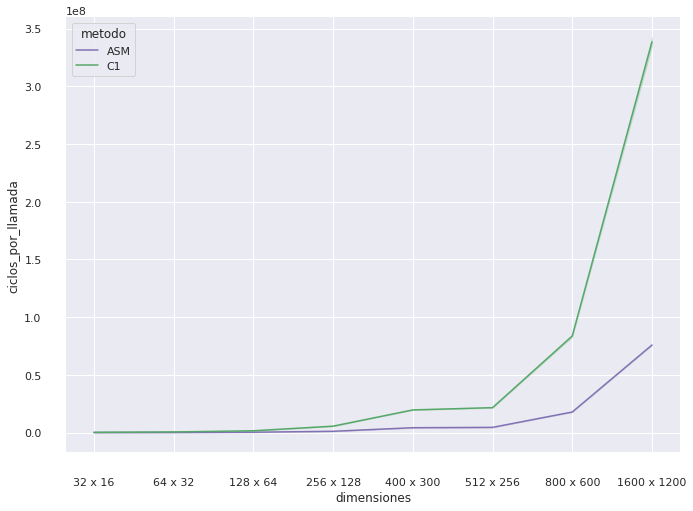

In [56]:
df_Max_ASM_tiempos['metodo'] ='ASM'
df_Max_C1_tiempos['metodo'] ='C1'
df_comp_Max = pd.concat([df_Max_ASM_tiempos, df_Max_C1_tiempos], axis=0)

#df_comp_Gamma = df_comp_Gamma[(df_comp_Gamma["cant_pixeles"]<1920000)].copy();
sns.lineplot(x="dimensiones", y="ciclos_por_llamada", hue="metodo",
            palette=["m", "g"],
            data=df_comp_Max)
sns.despine(offset=15, trim=True)
sns.set(rc={'figure.figsize':(11,8)})

### **--VIEJO--**

# Broken

In [39]:
df_Broken_ASM = pd.read_csv("resultados/Broken_ASM_tiempos.csv")
df_Broken_ASM.set_axis(['ASM'], axis='columns', inplace = True)
df_Broken_C_O0 = pd.read_csv("resultados/Broken_C_O0_tiempos.csv")
df_Broken_C_O0.set_axis(['C_O0'], axis='columns', inplace = True)
df_Broken_C_O1 = pd.read_csv("resultados/Broken_C_O1_tiempos.csv")
df_Broken_C_O1.set_axis(['C_O1'], axis='columns', inplace = True)
df_Broken_C_O2 = pd.read_csv("resultados/Broken_C_O2_tiempos.csv")
df_Broken_C_O2.set_axis(['C_O2'], axis='columns', inplace = True)
df_Broken_C_O3 = pd.read_csv("resultados/Broken_C_O3_tiempos.csv")
df_Broken_C_O3.set_axis(['C_O3'], axis='columns', inplace = True)
df_resultados_Broken = pd.concat([df_Broken_ASM, df_Broken_C_O0, df_Broken_C_O1, df_Broken_C_O2, df_Broken_C_O3], axis=1)
df_resultados_Broken.head()

FileNotFoundError: [Errno 2] No such file or directory: 'resultados/Broken_ASM_tiempos.csv'

In [4]:
df_Broken_ASM = pd.DataFrame()

for res in resoluciones:
    tamaño_filas = res[0]
    tamaño_columnas = res[1]
    cant_pixeles = tamaño_filas * tamaño_columnas
    df_Broken_ASM_actual = pd.read_csv("resultados/Broken/Broken_ASM_"+str(tamaño_filas)+"x"+str(tamaño_columnas)+".csv")
    df_Broken_ASM_actual.set_axis(['ciclos_por_llamada'], axis='columns', inplace = True)
    df_Broken_ASM_actual['tamaño_filas'] = tamaño_filas
    df_Broken_ASM_actual['tamaño_columnas'] = tamaño_columnas
    df_Broken_ASM_actual['cant_pixeles'] = cant_pixeles
    df_Broken_ASM_actual['dimensiones'] = "{} x {}".format(tamaño_filas, tamaño_columnas)
    df_Broken_ASM = df_Broken_ASM.append(df_Broken_ASM_actual, ignore_index = True, sort = False)
    

In [ ]:
boxplot = df_resultados_Broken.boxplot(column=['ASM','C_O0','C_O1','C_O2','C_O3'])
boxplot.set_ylabel("Ciclos insumidos por llamada")

In [ ]:
barplot = df_resultados_Broken.mean().plot(kind='bar')
barplot.set_ylabel("Ciclos insumidos por llamada")

In [ ]:
sns.boxplot(x="dimensiones", y="ciclos_por_llamada",
            palette=["m", "g"],
            data=df_Broken_ASM)
sns.despine(offset=15, trim=True)
sns.set(rc={'figure.figsize':(11,8)})

# Max

In [ ]:
df_max_ASM = pd.read_csv("resultados/Max_ASM_tiempos.csv")
df_max_ASM.set_axis(['ASM'], axis='columns', inplace = True)
df_max_O0 = pd.read_csv("resultados/Max_C_O0_tiempos.csv")
df_max_O0.set_axis(['C_O0'], axis='columns', inplace = True)
df_max_O1 = pd.read_csv("resultados/Max_C_O1_tiempos.csv")
df_max_O1.set_axis(['C_O1'], axis='columns', inplace = True)
df_max_O2 = pd.read_csv("resultados/Max_C_O2_tiempos.csv")
df_max_O2.set_axis(['C_O2'], axis='columns', inplace = True)
df_max_O3 = pd.read_csv("resultados/Max_C_O3_tiempos.csv")
df_max_O3.set_axis(['C_O3'], axis='columns', inplace = True)
df_resultados_max = pd.concat([df_max_ASM, df_max_O0, df_max_O1, df_max_O2, df_max_O3], axis=1)
df_resultados_max.head()

In [ ]:
df_Max_ASM_tiempos = pd.DataFrame()

for res in resoluciones:
    tamaño_filas = res[0]
    tamaño_columnas = res[1]
    cant_pixeles = tamaño_filas * tamaño_columnas
    df_Max_ASM_tiempos_actual = pd.read_csv("resultados/Max/Max_ASM_"+str(tamaño_filas)+"x"+str(tamaño_columnas)+".csv")
    df_Max_ASM_tiempos_actual.set_axis(['ciclos_por_llamada'], axis='columns', inplace = True)
    df_Max_ASM_tiempos_actual['tamaño_filas'] = tamaño_filas
    df_Max_ASM_tiempos_actual['tamaño_columnas'] = tamaño_columnas
    df_Max_ASM_tiempos_actual['cant_pixeles'] = cant_pixeles
    df_Max_ASM_tiempos_actual['dimensiones'] = "{} x {}".format(tamaño_filas, tamaño_columnas)
    df_Max_ASM_tiempos = df_Max_ASM_tiempos.append(df_Max_ASM_tiempos_actual, ignore_index = True, sort = False)
df_Max_ASM_tiempos.sort_values(by=['cant_pixeles'])

In [ ]:
boxplot = df_resultados_max.boxplot(column=['ASM','C_O0','C_O1','C_O2','C_O3'])
boxplot.set_ylabel("Ciclos insumidos por llamada")
plt.savefig("graficos/max_box.png")

In [ ]:
barplot = df_resultados_max.mean().plot(kind='bar')
barplot.set_ylabel("Ciclos insumidos por llamada")
plt.savefig("graficos/max_bar.png")

In [ ]:
sns.boxplot(x="dimensiones", y="ciclos_por_llamada",
            palette=["m", "g"],
            data=df_Max_ASM_tiempos)
sns.despine(offset=15, trim=True)
sns.set(rc={'figure.figsize':(11,8)})

# Experimento 1

In [6]:
df_BrokenExp = pd.DataFrame()

for res in resoluciones:
    tamaño_filas = res[0]
    tamaño_columnas = res[1]
    cant_pixeles = tamaño_filas * tamaño_columnas
    df_BrokenExp_actual = pd.read_csv("resultados/BrokenExp/BrokenExp_ASM_"+str(tamaño_filas)+"x"+str(tamaño_columnas)+".csv")
    df_BrokenExp_actual.set_axis(['ciclos_por_llamada'], axis='columns', inplace = True)
    df_BrokenExp_actual['tamaño_filas'] = tamaño_filas
    df_BrokenExp_actual['tamaño_columnas'] = tamaño_columnas
    df_BrokenExp_actual['cant_pixeles'] = cant_pixeles
    df_BrokenExp_actual['dimensiones'] = "{} x {}".format(tamaño_filas, tamaño_columnas)
    df_BrokenExp = df_BrokenExp.append(df_BrokenExp_actual, ignore_index = True, sort = False)



df_Broken_ASM_tiempos['metodo'] ='SIMD'
#df_BrokenExp_ASM = pd.read_csv("resultados/BrokenExp_ASM_tiempos.csv")
df_BrokenExp['metodo'] ='SISD'
df_Exp1 = pd.concat([df_Broken_ASM_tiempos, df_BrokenExp], axis=0)
df_Exp1.head()

,ciclos_por_llamada,tamaño_filas,tamaño_columnas,cant_pixeles,dimensiones,metodo
0,11867,32,16,512,32 x 16,SIMD
1,9725,32,16,512,32 x 16,SIMD
2,10317,32,16,512,32 x 16,SIMD
3,9676,32,16,512,32 x 16,SIMD
4,9288,32,16,512,32 x 16,SIMD


In [ ]:
boxplot = df_Exp1.boxplot()
boxplot.set_ylabel("Ciclos insumidos por llamada")
plt.savefig("graficos/exp1_box.png")

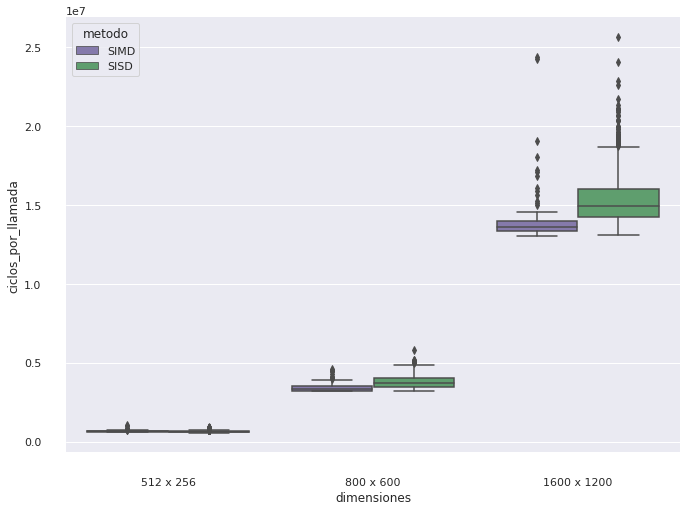

In [9]:
df_dimensionesH_Exp1 = df_Exp1[(df_Exp1["tamaño_filas"]>400)].copy();
sns.boxplot(x="dimensiones", y="ciclos_por_llamada", hue="metodo",
            palette=["m", "g"],
            data=df_dimensionesH_Exp1)
sns.despine(offset=15, trim=True)
sns.set(rc={'figure.figsize':(11,8)})

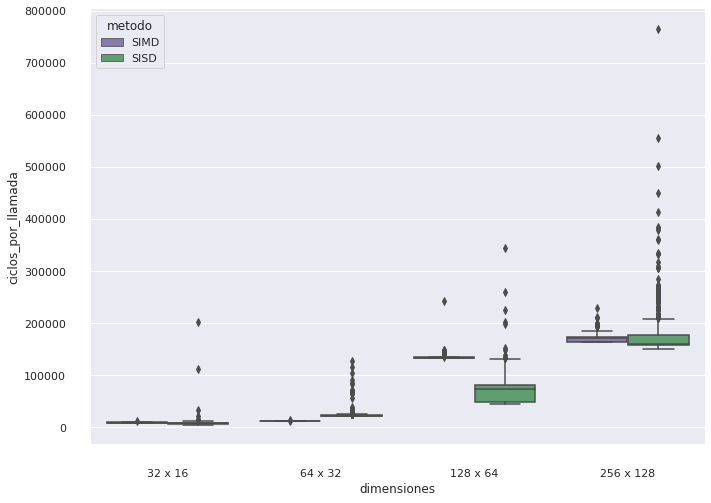

In [10]:
df_dimensionesL_Exp1 = df_Exp1[(df_Exp1["tamaño_filas"]<400)].copy();
sns.boxplot(x="dimensiones", y="ciclos_por_llamada", hue="metodo",
            palette=["m", "g"],
            data=df_dimensionesL_Exp1)
sns.despine(offset=15, trim=True)
sns.set(rc={'figure.figsize':(11,8)})

# Experimento 2

In [ ]:
df_max_ASM.set_axis(['Horizontal ASM'], axis='columns', inplace = True)
df_max_v_ASM = pd.read_csv("resultados/Max_v_ASM_tiempos.csv")
df_max_v_ASM.set_axis(['Vertical ASM'], axis='columns', inplace = True)
df_Exp2_ASM = pd.concat([df_max_ASM, df_max_v_ASM], axis=1)
df_Exp2_ASM.head()

In [ ]:
df_max_v_ASM = pd.DataFrame()

for res in resoluciones:
    tamaño_filas = res[0]
    tamaño_columnas = res[1]
    cant_pixeles = tamaño_filas * tamaño_columnas
    df_max_v_ASM_actual = pd.read_csv("resultados/Max_v/Max_v_ASM_"+str(tamaño_filas)+"x"+str(tamaño_columnas)+".csv")
    df_max_v_ASM_actual.set_axis(['ciclos_por_llamada'], axis='columns', inplace = True)
    df_max_v_ASM_actual['tamaño_filas'] = tamaño_filas
    df_max_v_ASM_actual['tamaño_columnas'] = tamaño_columnas
    df_max_v_ASM_actual['cant_pixeles'] = cant_pixeles
    df_max_v_ASM_actual['dimensiones'] = "{} x {}".format(tamaño_filas, tamaño_columnas)
    df_max_v_ASM = df_max_v_ASM.append(df_max_v_ASM_actual, ignore_index = True, sort = False)



df_Max_ASM_tiempos['metodo'] ='Horizontal ASM'
#df_BrokenExp_ASM = pd.read_csv("resultados/BrokenExp_ASM_tiempos.csv")
df_max_v_ASM['metodo'] ='Vertical ASM'
df_dimensiones_Exp2 = pd.concat([df_Max_ASM_tiempos, df_max_v_ASM], axis=0)
df_dimensiones_Exp2.head()

In [ ]:
boxplot = df_Exp2_ASM.boxplot()
boxplot.set_ylabel("Ciclos insumidos por llamada")
plt.savefig("graficos/exp2_box.png")

In [ ]:
barplot = df_Exp2_ASM.mean().plot(kind='bar')
barplot.set_ylabel("Ciclos insumidos por llamada")
plt.savefig("graficos/exp2_bar.png")

In [ ]:
df_max_C = pd.read_csv("resultados/Max_C_tiempos.csv")
df_max_C.set_axis(['Horizontal C'], axis='columns', inplace = True)
df_max_v_C = pd.read_csv("resultados/Max_v_C_tiempos.csv")
df_max_v_C.set_axis(['Vertical C'], axis='columns', inplace = True)
df_Exp2_C = pd.concat([df_max_C, df_max_v_C], axis=1)
df_Exp2_C.head()

In [ ]:
boxplot = df_Exp2_C.boxplot()
boxplot.set_ylabel("Ciclos insumidos por llamada")
plt.savefig("graficos/exp2_C_box.png")

In [ ]:
barplot = df_Exp2_C.mean().plot(kind='bar')
barplot.set_ylabel("Ciclos insumidos por llamada")
plt.savefig("graficos/exp2_C_bar.png")

In [ ]:
sns.boxplot(x="dimensiones", y="ciclos_por_llamada", hue="metodo",
            palette=["m", "g"],
            data=df_dimensiones_Exp2)
sns.despine(offset=15, trim=True)
sns.set(rc={'figure.figsize':(11,8)})